In [1]:
import numpy as np
import pandas as pd

# Pandas I

## Object Series

In [ ]:
t = ('Zuckerberg', 42, 'Gates', 'Bezos', 'Musk')
print(pd.Series(data=t))
print(type(pd.Series(data=t)[0])) # Prints "<class 'str'>"
print(type(pd.Series(data=t)[1])) # Prints "<class 'int'>"

0    Zuckerberg
1            42
2         Gates
3         Bezos
4          Musk
dtype: object
<class 'str'>
<class 'int'>


In [ ]:
s = pd.Series(data=t, index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s['a'])                     # Prints "Zuckerberg"

a    Zuckerberg
b            42
c         Gates
d         Bezos
e          Musk
dtype: object
Zuckerberg


In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
print(pd.Series(data=d))

person    2
cat       4
spider    8
dtype: int64


## DataFrame

In [ ]:
animal = ['person', 'cat', 'spider', 'panda']
arms = [2,4,8,2]
pd.DataFrame(data={'animal': animal, 'arms': pd.Series(arms)})

,animal,arms
0,person,2
1,cat,4
2,spider,8
3,panda,2


In [ ]:
pd.DataFrame(np.array([['person', 2], ['cat',4], ['spider',8], ['panda',2]]),
             columns=['animal', 'arms'])


,animal,arms
0,person,2
1,cat,4
2,spider,8
3,panda,2


## Training #1

In [1]:
import numpy as np
import pandas as pd

In [2]:
name = ['Roman Bürki', 'Marvin Hitz', 'Greogor Kobel', 'Marco Reus']
games = [200, 60, 30, 372]
age = [31,34,23,34]

In [3]:
df_soccer_player = pd.DataFrame(data={"name":name, "age":age, "games":games})

In [5]:
df_soccer_player

,name,age,games
0,Roman Bürki,31,200
1,Marvin Hitz,34,60
2,Greogor Kobel,23,30
3,Marco Reus,34,372


## Importing Data

In [ ]:
url = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2425/refs/heads/main/Demo/Datensaetze/FHDTM-P2DS-WS2425-Project-Demo-1.1-Data-Acquisition-Transfermarkt_BVB.csv"
df_bvb_player = pd.read_csv(url)


### Importing Data with Colab and Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

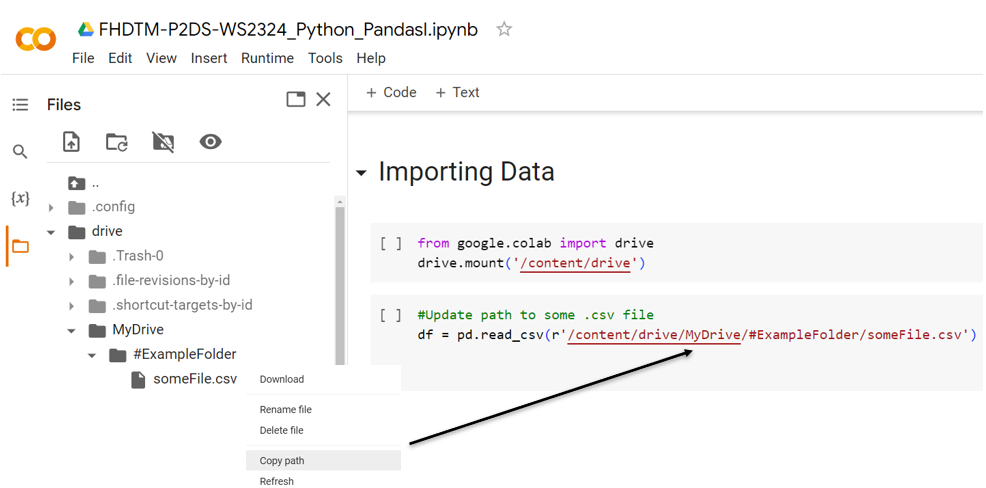

In [ ]:
#Update path to desired .csv file
df = pd.read_csv(r'/content/drive/MyDrive/#ExampleFolder/someFile.csv')

## Inspecting Data

In [ ]:
df_bvb_player.columns

Index(['club_name', 'club_league', 'player_position', 'player_number',
       'player_name', 'player_dob', 'player_country', 'player_value'],
      dtype='object')

In [ ]:
df_bvb_player.shape

(30, 8)

In [ ]:
df_bvb_player.size

240

In [ ]:
df_bvb_player.index

RangeIndex(start=0, stop=30, step=1)

In [ ]:
df_bvb_player.player_position.value_counts()

Abwehr        10
Mittelfeld     9
Sturm          7
Torwart        4
Name: player_position, dtype: int64

### Example: Power of Pandas+Python

In [ ]:
for position, count in df_bvb_player.player_position.value_counts().items():
  percentage = round(count/len(df_bvb_player), 2) * 100
  print(position, percentage)

Abwehr 33.0
Mittelfeld 30.0
Sturm 23.0
Torwart 13.0


In [ ]:
position_plot = []
value_plot = []

for position, count in df_bvb_player.player_position.value_counts().items():
  percentage = round(count/len(df_bvb_player), 2) * 100
  #print(position, percentage)
  position_plot.append(position)
  value_plot.append(percentage)


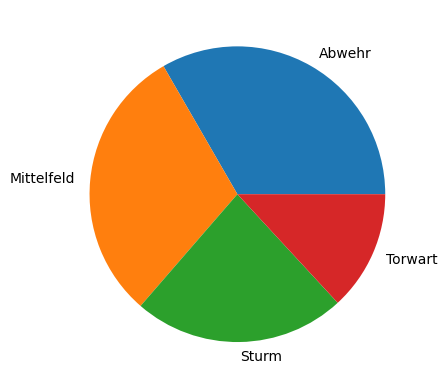

In [ ]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(value_plot, labels=position_plot)
plt.show()

## Viewing Data

In [ ]:
df_bvb_player.head(2)

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"


In [ ]:
df_bvb_player.tail(2)

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
28,Borussia Dortmund,Bundesliga,Sturm,9,Sébastien Haller,22.06.1994 (29),Elfenbeinküste,"30,00 Mio. €"
29,Borussia Dortmund,Bundesliga,Sturm,18,Youssoufa Moukoko,20.11.2004 (18),Deutschland,"30,00 Mio. €"


## Data Indexing

In [ ]:
df_bvb_player.keys()

Index(['club_name', 'club_league', 'player_position', 'player_number',
       'player_name', 'player_dob', 'player_country', 'player_value'],
      dtype='object')

In [ ]:
df_bvb_player[1:3]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"


In [ ]:
df_bvb_player.set_index(['player_number'])

,club_name,club_league,player_position,player_name,player_dob,player_country,player_value
player_number,,,,,,,
1,Borussia Dortmund,Bundesliga,Torwart,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
35,Borussia Dortmund,Bundesliga,Torwart,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
33,Borussia Dortmund,Bundesliga,Torwart,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
31,Borussia Dortmund,Bundesliga,Torwart,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"


In [ ]:
#copy behaviour usually inplace=False,
#if wanted, change parameter or overwrite object in need

In [ ]:
df_bvb_player = df_bvb_player.set_index(['player_number'])

In [ ]:
df_bvb_player.set_index(['player_number'], inplace=True)

## Data Selection

In [ ]:
df_bvb_player.head()

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"


In [ ]:
df_bvb_player.loc[11]

club_name          Borussia Dortmund
club_league               Bundesliga
player_position               Abwehr
player_number                     17
player_name              Marius Wolf
player_dob           27.05.1995 (28)
player_country           Deutschland
player_value            10,00 Mio. €
Name: 11, dtype: object

In [ ]:
df_bvb_player.iloc[11]

club_name          Borussia Dortmund
club_league               Bundesliga
player_position               Abwehr
player_name              Marius Wolf
player_dob           27.05.1995 (28)
player_country           Deutschland
player_value            10,00 Mio. €
Name: 17, dtype: object

In [ ]:
df_bvb_player["club_name"]

In [ ]:
df_bvb_player[["club_name","player_name","player_dob"]].head()

,club_name,player_name,player_dob
player_number,,,
1,Borussia Dortmund,Gregor Kobel,06.12.1997 (25)
35,Borussia Dortmund,Marcel Lotka,25.05.2001 (22)
33,Borussia Dortmund,Alexander Meyer,13.04.1991 (32)
31,Borussia Dortmund,Silas Ostrzinski,19.11.2003 (19)
4,Borussia Dortmund,Nico Schlotterbeck,01.12.1999 (23)


## Data Deletion

In [ ]:
df_bvb_player.drop(index=[1])

,club_name,club_league,player_position,player_name,player_dob,player_country,player_value
player_number,,,,,,,
35,Borussia Dortmund,Bundesliga,Torwart,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
33,Borussia Dortmund,Bundesliga,Torwart,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
31,Borussia Dortmund,Bundesliga,Torwart,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"
25,Borussia Dortmund,Bundesliga,Abwehr,Niklas Süle,03.09.1995 (27),Deutschland,"35,00 Mio. €"
15,Borussia Dortmund,Bundesliga,Abwehr,Mats Hummels,16.12.1988 (34),Deutschland,"6,00 Mio. €"
44,Borussia Dortmund,Bundesliga,Abwehr,Soumaïla Coulibaly,14.10.2003 (19),Frankreich,"1,00 Mio. €"
47,Borussia Dortmund,Bundesliga,Abwehr,Antonios Papadopoulos,10.09.1999 (23),Deutschland,600 Tsd. €
5,Borussia Dortmund,Bundesliga,Abwehr,Ramy Bensebaini,16.04.1995 (28),Algerien,"20,00 Mio. €"


In [ ]:
df_bvb_player.drop(columns=["club_league"]).head()

,club_name,player_position,player_name,player_dob,player_country,player_value
player_number,,,,,,
1,Borussia Dortmund,Torwart,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
35,Borussia Dortmund,Torwart,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
33,Borussia Dortmund,Torwart,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
31,Borussia Dortmund,Torwart,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Abwehr,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"


## DataFrame as Array

In [ ]:
df_bvb_player = pd.read_csv(url)

In [ ]:
df_bvb_player.values[0:5]

array([['Borussia Dortmund', 'Bundesliga', 'Torwart', 1, 'Gregor Kobel',
        '06.12.1997 (25)', 'Schweiz', '35,00 Mio. €'],
       ['Borussia Dortmund', 'Bundesliga', 'Torwart', 35, 'Marcel Lotka',
        '25.05.2001 (22)', 'Deutschland', '1,50 Mio. €'],
       ['Borussia Dortmund', 'Bundesliga', 'Torwart', 33,
        'Alexander Meyer', '13.04.1991 (32)', 'Deutschland',
        '1,00 Mio. €'],
       ['Borussia Dortmund', 'Bundesliga', 'Torwart', 31,
        'Silas Ostrzinski', '19.11.2003 (19)', 'Deutschland',
        '150 Tsd. €'],
       ['Borussia Dortmund', 'Bundesliga', 'Abwehr', 4,
        'Nico Schlotterbeck', '01.12.1999 (23)', 'Deutschland',
        '40,00 Mio. €']], dtype=object)

In [ ]:
df_bvb_player.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
club_name,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,...,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund,Borussia Dortmund
club_league,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,...,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga,Bundesliga
player_position,Torwart,Torwart,Torwart,Torwart,Abwehr,Abwehr,Abwehr,Abwehr,Abwehr,Abwehr,...,Mittelfeld,Mittelfeld,Mittelfeld,Sturm,Sturm,Sturm,Sturm,Sturm,Sturm,Sturm
player_number,1,35,33,31,4,25,15,44,47,5,...,19,7,11,27,43,10,21,16,9,18
player_name,Gregor Kobel,Marcel Lotka,Alexander Meyer,Silas Ostrzinski,Nico Schlotterbeck,Niklas Süle,Mats Hummels,Soumaïla Coulibaly,Antonios Papadopoulos,Ramy Bensebaini,...,Julian Brandt,Giovanni Reyna,Marco Reus,Karim Adeyemi,Jamie Bynoe-Gittens,Thorgan Hazard,Donyell Malen,Julien Duranville,Sébastien Haller,Youssoufa Moukoko
player_dob,06.12.1997 (25),25.05.2001 (22),13.04.1991 (32),19.11.2003 (19),01.12.1999 (23),03.09.1995 (27),16.12.1988 (34),14.10.2003 (19),10.09.1999 (23),16.04.1995 (28),...,02.05.1996 (27),13.11.2002 (20),31.05.1989 (34),18.01.2002 (21),08.08.2004 (19),29.03.1993 (30),19.01.1999 (24),05.05.2006 (17),22.06.1994 (29),20.11.2004 (18)
player_country,Schweiz,Deutschland,Deutschland,Deutschland,Deutschland,Deutschland,Deutschland,Frankreich,Deutschland,Algerien,...,Deutschland,Vereinigte Staaten,Deutschland,Deutschland,England,Belgien,Niederlande,Belgien,Elfenbeinküste,Deutschland
player_value,"35,00 Mio. €","1,50 Mio. €","1,00 Mio. €",150 Tsd. €,"40,00 Mio. €","35,00 Mio. €","6,00 Mio. €","1,00 Mio. €",600 Tsd. €,"20,00 Mio. €",...,"40,00 Mio. €","25,00 Mio. €","7,00 Mio. €","40,00 Mio. €","14,00 Mio. €","7,00 Mio. €","28,00 Mio. €","8,50 Mio. €","30,00 Mio. €","30,00 Mio. €"


##Operating on Data (Preview)

In [ ]:
df_bvb_player.player_number %2 == 0

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7      True
8     False
9     False
10     True
11    False
12     True
13     True
14    False
15     True
16     True
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25     True
26    False
27     True
28    False
29     True
Name: player_number, dtype: bool

In [ ]:
df_bvb_player[df_bvb_player.player_number %2 == 0]

In [ ]:
df_bvb_player['is_even'] = df_bvb_player.player_number %2 == 0

In [ ]:
df_bvb_player.head()

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value,is_even
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €",False
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €",False
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €",False
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €,False
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €",True


## Data Masking

In [ ]:
df_bvb_player.player_number > 40

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28    False
29    False
Name: player_number, dtype: bool

In [ ]:
df_bvb_player[df_bvb_player.player_number > 40]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
7,Borussia Dortmund,Bundesliga,Abwehr,44,Soumaïla Coulibaly,14.10.2003 (19),Frankreich,"1,00 Mio. €"
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,10.09.1999 (23),Deutschland,"1,00 Mio. €"
24,Borussia Dortmund,Bundesliga,Sturm,43,Jamie Bynoe-Gittens,08.08.2004 (19),England,"14,00 Mio. €"


In [ ]:
df_bvb_player[(df_bvb_player.player_number > 40) &
              (df_bvb_player.player_country == "Deutschland")]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,10.09.1999 (23),Deutschland,"1,00 Mio. €"


In [ ]:
df_bvb_player.loc[(df_bvb_player.player_number > 40) &
                  (df_bvb_player.player_country == "Deutschland"),
                  "player_value"]

8    1,00 Mio. €
Name: player_value, dtype: object

In [ ]:
df_bvb_player.loc[(df_bvb_player.player_number > 40) &
                  (df_bvb_player.player_country == "Deutschland"),
                  "player_value"]

8    1,00 Mio. €
Name: player_value, dtype: object

## Training #2

In [6]:
import numpy as np
import pandas as pd

In [7]:
url = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2425/refs/heads/main/Demo/Datensaetze/FHDTM-P2DS-WS2425-Project-Demo-1.1-Data-Acquisition-Transfermarkt_BVB.csv"
df_bvb_player = pd.read_csv(url)


### Part 1

In [8]:
mask = df_bvb_player.player_country == "Norwegen"

In [9]:
df_bvb_player[mask]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
10,Borussia Dortmund,Bundesliga,Abwehr,26,Julian Ryerson,17.11.1997 (25),Norwegen,"13,00 Mio. €"


In [10]:
df_bvb_player[df_bvb_player.player_country == "Norwegen"].index

Index([10], dtype='int64')

In [11]:
df_bvb_player.drop(
    df_bvb_player[mask].index,
    inplace=True)

In [12]:
df_bvb_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"
5,Borussia Dortmund,Bundesliga,Abwehr,25,Niklas Süle,03.09.1995 (27),Deutschland,"35,00 Mio. €"
6,Borussia Dortmund,Bundesliga,Abwehr,15,Mats Hummels,16.12.1988 (34),Deutschland,"6,00 Mio. €"
7,Borussia Dortmund,Bundesliga,Abwehr,44,Soumaïla Coulibaly,14.10.2003 (19),Frankreich,"1,00 Mio. €"
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,10.09.1999 (23),Deutschland,600 Tsd. €
9,Borussia Dortmund,Bundesliga,Abwehr,5,Ramy Bensebaini,16.04.1995 (28),Algerien,"20,00 Mio. €"


In [13]:
#alternative
df_bvb_player[df_bvb_player.player_country != "Norwegen"]

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"
5,Borussia Dortmund,Bundesliga,Abwehr,25,Niklas Süle,03.09.1995 (27),Deutschland,"35,00 Mio. €"
6,Borussia Dortmund,Bundesliga,Abwehr,15,Mats Hummels,16.12.1988 (34),Deutschland,"6,00 Mio. €"
7,Borussia Dortmund,Bundesliga,Abwehr,44,Soumaïla Coulibaly,14.10.2003 (19),Frankreich,"1,00 Mio. €"
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,10.09.1999 (23),Deutschland,600 Tsd. €
9,Borussia Dortmund,Bundesliga,Abwehr,5,Ramy Bensebaini,16.04.1995 (28),Algerien,"20,00 Mio. €"


### Part 2

In [14]:
from datetime import date, timedelta, datetime

In [15]:
df_bvb_player.columns

Index(['club_name', 'club_league', 'player_position', 'player_number',
       'player_name', 'player_dob', 'player_country', 'player_value'],
      dtype='object')

In [16]:
new_player_dict={"club_name": "Borussia Dortmund",
                 "club_league": "Bundesliga",
                 "player_position": np.NaN,
                 "player_number":np.NaN,
                 "player_name": "Hanna Muster",
                 "player_dob": "17.07.2000 (" +
                 str(((date.today() - date(2000, 7, 17))
                 // timedelta(days=365.2425))) + ")",
                 "player_country": "Deutschland"}

In [17]:
len(df_bvb_player)

29

In [18]:
df_bvb_player.loc[len(df_bvb_player)] = pd.Series(data=new_player_dict)

In [ ]:
df_bvb_player.tail()

## Viewing Meta Data

In [ ]:
df_bvb_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   club_name        30 non-null     object
 1   club_league      30 non-null     object
 2   player_position  30 non-null     object
 3   player_number    30 non-null     int64 
 4   player_name      30 non-null     object
 5   player_dob       30 non-null     object
 6   player_country   30 non-null     object
 7   player_value     30 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [ ]:
df_bvb_player.describe()

,player_number
count,30.000000
mean,20.300000
std,12.809345
min,1.000000
25%,9.250000
50%,19.500000
75%,29.250000
max,47.000000


## Think-Pair-Share #1

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/leotraeg/FHDTM-P2DS-WS2425/refs/heads/main/Demo/Datensaetze/FHDTM-P2DS-WS2425-Project-Demo-1.1-Data-Acquisition-Transfermarkt_BVB.csv"
df_bvb_player = pd.read_csv(url)


In [ ]:
df_bvb_player

,club_name,club_league,player_position,player_number,player_name,player_dob,player_country,player_value
0,Borussia Dortmund,Bundesliga,Torwart,1,Gregor Kobel,06.12.1997 (25),Schweiz,"35,00 Mio. €"
1,Borussia Dortmund,Bundesliga,Torwart,35,Marcel Lotka,25.05.2001 (22),Deutschland,"1,50 Mio. €"
2,Borussia Dortmund,Bundesliga,Torwart,33,Alexander Meyer,13.04.1991 (32),Deutschland,"1,00 Mio. €"
3,Borussia Dortmund,Bundesliga,Torwart,31,Silas Ostrzinski,19.11.2003 (19),Deutschland,150 Tsd. €
4,Borussia Dortmund,Bundesliga,Abwehr,4,Nico Schlotterbeck,01.12.1999 (23),Deutschland,"40,00 Mio. €"
5,Borussia Dortmund,Bundesliga,Abwehr,25,Niklas Süle,03.09.1995 (27),Deutschland,"35,00 Mio. €"
6,Borussia Dortmund,Bundesliga,Abwehr,15,Mats Hummels,16.12.1988 (34),Deutschland,"6,00 Mio. €"
7,Borussia Dortmund,Bundesliga,Abwehr,44,Soumaïla Coulibaly,14.10.2003 (19),Frankreich,"1,00 Mio. €"
8,Borussia Dortmund,Bundesliga,Abwehr,47,Antonios Papadopoulos,10.09.1999 (23),Deutschland,600 Tsd. €
9,Borussia Dortmund,Bundesliga,Abwehr,5,Ramy Bensebaini,16.04.1995 (28),Algerien,"20,00 Mio. €"
